<a href="https://colab.research.google.com/github/Tdas-christ/Reinforcement_Learning/blob/main/2348569_RL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned policy: {0: 0, 4: 0, 1: 0, 8: 0, 9: 0, 2: 0, 3: 0, 10: 0, 14: 0, 13: 0, 6: 0}
Average reward over 100 episodes: 0.00

Optimal Policy:
← ← ← ←
←   ←  
← ← ←  
  ← ←  


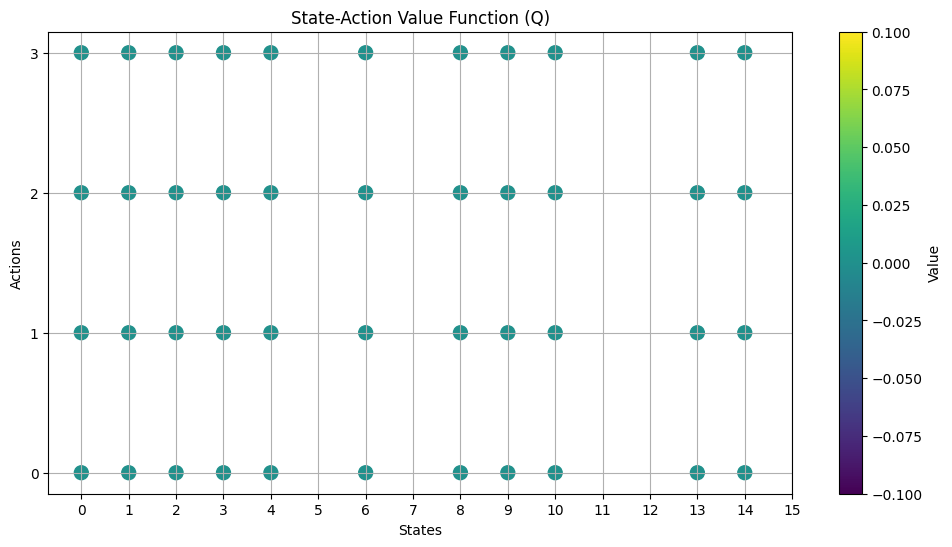

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import gym

def epsilon_greedy_policy(Q, state, nA, epsilon):
    """Epsilon-greedy policy for action selection."""
    policy = np.ones(nA) * (epsilon / nA)
    best_action = np.argmax(Q[state])
    policy[best_action] += 1 - epsilon
    return policy

def generate_episode(env, Q, epsilon):
    """Generate an episode by following an epsilon-greedy policy."""
    state = env.reset()
    episode = []
    done = False

    while not done:
        action_probs = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode.append((state, action, reward))
        state = next_state

    return episode

def mc_control(env, num_episodes, gamma=1.0, epsilon=0.1, alpha=0.1):
    """Monte Carlo control with epsilon-greedy policy."""
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    for episode in range(num_episodes):
        # Generate an episode
        episode_data = generate_episode(env, Q, epsilon)

        # Compute returns and update Q-values
        G = 0
        visited = set()
        for state, action, reward in reversed(episode_data):
            G = reward + gamma * G
            if (state, action) not in visited:
                visited.add((state, action))
                Q[state][action] += alpha * (G - Q[state][action])

    # Derive the optimal policy
    policy = {state: np.argmax(actions) for state, actions in Q.items()}
    return Q, policy

def evaluate_policy(env, policy, num_episodes=100):
    """Evaluate a policy by running it in the environment."""
    total_rewards = 0
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            action = policy.get(state, np.random.choice(env.action_space.n))
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_rewards += reward
    return total_rewards / num_episodes

def visualize_policy(policy, grid_size):
    """Visualize the policy for a grid environment."""
    actions = ['←', '↓', '→', '↑']  # Action mapping
    grid_policy = np.full(grid_size, ' ')  # Initialize grid with blank spaces

    for state, action in policy.items():
        row, col = divmod(state, grid_size[1])  # Convert linear index to 2D indices
        grid_policy[row, col] = actions[action]

    return grid_policy

# Main script
if __name__ == "__main__":
    # Load environment
    env = gym.make("FrozenLake-v1", is_slippery=False, render_mode=None, new_step_api=True)  # Using the new step API

    # Parameters
    num_episodes = 10000
    gamma = 1.0  # Discount factor
    epsilon = 0.1  # Exploration rate
    alpha = 0.1  # Learning rate

    # Monte Carlo Control
    Q, policy = mc_control(env, num_episodes, gamma, epsilon, alpha)
    print("Learned policy:", policy)

    # Evaluate the policy
    avg_reward = evaluate_policy(env, policy)
    print(f"Average reward over 100 episodes: {avg_reward:.2f}")

    # Visualize the policy
    grid_policy = visualize_policy(policy, grid_size=(4, 4))
    print("\nOptimal Policy:")
    for row in grid_policy:
        print(" ".join(row))

    # Plotting action-value function
    plt.figure(figsize=(12, 6))
    plt.title("State-Action Value Function (Q)")
    states, actions, values = [], [], []
    for state, action_values in Q.items():
        for action, value in enumerate(action_values):
            states.append(state)
            actions.append(action)
            values.append(value)
    plt.scatter(states, actions, c=values, cmap='viridis', s=100)
    plt.colorbar(label='Value')
    plt.xlabel("States")
    plt.ylabel("Actions")
    plt.xticks(range(16))
    plt.yticks(range(env.action_space.n))
    plt.grid()
    plt.show()


In [7]:
import numpy as np

class FrozenLakeGame:
    def __init__(self):
        self.grid = np.array([
            ['S', 'F', 'F', 'F'],
            ['F', 'H', 'F', 'H'],
            ['F', 'F', 'F', 'H'],
            ['H', 'F', 'F', 'G']
        ])
        self.player_pos = [0, 0]  # Start at 'S'
        self.goal_pos = [3, 3]  # Position of 'G'

    def display_grid(self):
        """Display the current state of the grid."""
        display = self.grid.copy()
        display[self.player_pos[0], self.player_pos[1]] = 'P'
        for row in display:
            print(" ".join(row))
        print()

    def move(self, action):
        """Move the player based on the chosen action."""
        moves = {
            "up": [-1, 0],
            "down": [1, 0],
            "left": [0, -1],
            "right": [0, 1]
        }
        if action not in moves:
            print("Invalid action! Choose from 'up', 'down', 'left', or 'right'.")
            return False

        # Calculate new position
        new_pos = [
            self.player_pos[0] + moves[action][0],
            self.player_pos[1] + moves[action][1]
        ]

        # Check for boundary conditions
        if new_pos[0] < 0 or new_pos[0] >= 4 or new_pos[1] < 0 or new_pos[1] >= 4:
            print("You can't move outside the grid!")
            return False

        self.player_pos = new_pos
        tile = self.grid[self.player_pos[0], self.player_pos[1]]

        # Check tile type
        if tile == 'H':
            print("Oh no! You fell into a hole. Game over!")
            return True
        elif tile == 'G':
            print("Congratulations! You reached the goal!")
            return True
        else:
            print("You moved to a safe tile.")
            return False

    def play(self):
        """Start the game loop."""
        print("Welcome to FrozenLake!")
        print("Your goal is to reach the 'G' while avoiding holes ('H').")
        print("You can move using 'up', 'down', 'left', or 'right'.\n")
        self.display_grid()

        while True:
            action = input("Enter your move: ").strip().lower()
            game_over = self.move(action)
            self.display_grid()
            if game_over:
                break


# Start the game
if __name__ == "__main__":
    game = FrozenLakeGame()
    game.play()


Welcome to FrozenLake!
Your goal is to reach the 'G' while avoiding holes ('H').
You can move using 'up', 'down', 'left', or 'right'.

P F F F
F H F H
F F F H
H F F G

Enter your move: right
You moved to a safe tile.
S P F F
F H F H
F F F H
H F F G

Enter your move: right
You moved to a safe tile.
S F P F
F H F H
F F F H
H F F G

Enter your move: down
You moved to a safe tile.
S F F F
F H P H
F F F H
H F F G

Enter your move: down
You moved to a safe tile.
S F F F
F H F H
F F P H
H F F G

Enter your move: down
You moved to a safe tile.
S F F F
F H F H
F F F H
H F P G

Enter your move: right
Congratulations! You reached the goal!
S F F F
F H F H
F F F H
H F F P

